28x28 grayscale

In [2]:
# 리스트 8-1(1)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test,) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


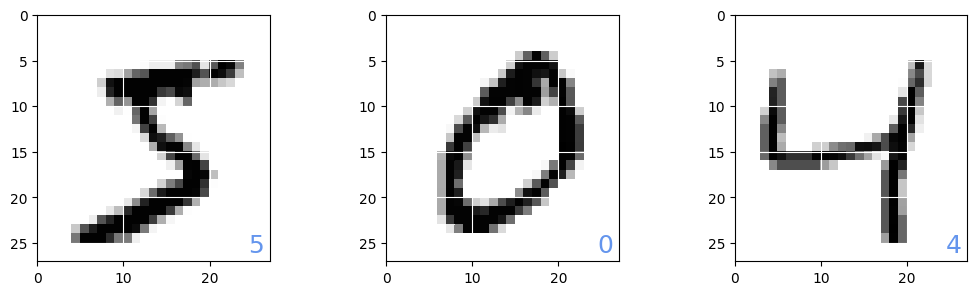

In [3]:
# 리스트 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
  plt.subplot(1,3, id+1)
  img = x_train[id, :, :]
  plt.pcolor(255 - img)
  plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue', fontsize=18)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.grid('on', color='white')

plt.show()

2층 feed forward network

In [4]:
# 리스트 8-1-(3)
from keras.utils import to_categorical

x_train = x_train.reshape(60000, 784) #(A)
x_train = x_train.astype('float32') #(B)
x_train = x_train / 255 #(C)

num_classes = 10
y_train = to_categorical(y_train, num_classes) #(D)
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes)

In [5]:
# 리스트 8-1-(4)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A)
model.add( Dense(16, input_dim=784, activation='sigmoid') ) #(B) 784차원을 입력 받는 16개의 중간층
model.add( Dense(10, activation='softmax') ) #(C) 10개의 출력층
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) #(D) Adaptive momentum estimation


In [6]:
# 리스트 8-1-(5)
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) #(A)
# verbose는 학습과정의 표시 유무; (오차, 정밀도, 계산시간 표)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 2s 9ms/step - loss: 1.9494 - accuracy: 0.4944 - val_loss: 1.6311 - val_accuracy: 0.7337
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 1.4600 - accuracy: 0.7631 - val_loss: 1.2864 - val_accuracy: 0.7992
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 1.1808 - accuracy: 0.8100 - val_loss: 1.0581 - val_accuracy: 0.8350
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.9850 - accuracy: 0.8368 - val_loss: 0.8923 - val_accuracy: 0.8524
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.8411 - accuracy: 0.8536 - val_loss: 0.7701 - val_accuracy: 0.8661
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7343 - accuracy: 0.8668 - val_loss: 0.6796 - val_accuracy: 0.8743
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.8752 - val_loss: 0.6115 - val_accuracy: 0.8808
Epoch 8/10
60/60 [==

SGD 어쩔 수 없이 확률적이기 때문에 일부 데이터셋에서 계산된 기울기 방향은 전체 데이터 셋에서 계산된 기울기 방향과는 약간 다르다. 전체 오차를 최소화하는 방향으로 곧장 나아가는 것이 아니라 노이즈 영향을 받는 것처럼 휘청거리면서 서서히 오차가 낮은 방향으로 나아갑니다.

휘청거리는 효과 덕분에 국소해를 벗어날 수 있다.

국소해 local minimum

전역해 global minimum

60,000에서 1,000데이터를 minibatch로 하면 60회가 이루어진다. 이를 1 epochs(학습갱신 횟수)

10epochs라면 60x10 해서 미니배치 기준 600회 갱신한다.전체를 10번 한다.

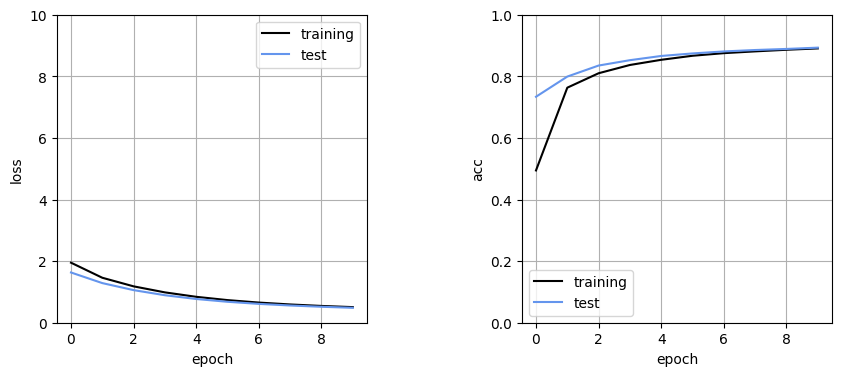

In [7]:
# 리스트 8-1-(6)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

313/313 [==============================] - 1s 2ms/step


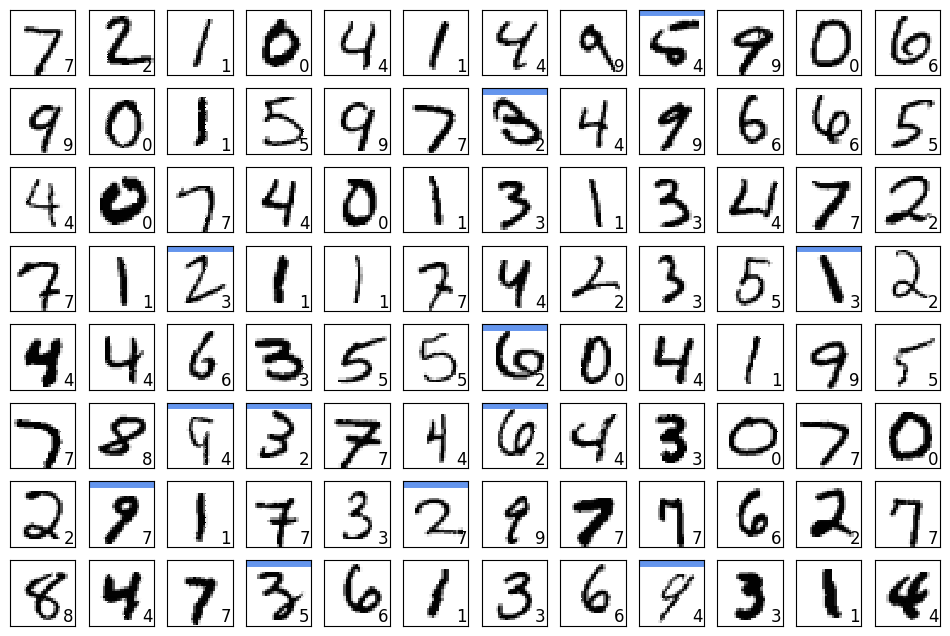

In [8]:
# 리스트 8-1-(7)

def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()

  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot( [0,27], [1,1], color='cornflowerblue', linewidth=5 )
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")

#메인
show_prediction()
plt.show()


ReLU; Rectified Linear Unit;2015 네이쳐 논 ReLU가 활성화함수로서 최선

시그모이드는 입력이 너무 크면 기울기가 0에 가깝기 때문에 학습이 늦어진다. 이를 극복할 수 있다. 또한 max(0,x)로 계산이 빠르다.

In [9]:
# 리스트 8-1-(8)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) #(A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))


Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 1.5146 - accuracy: 0.6001 - val_loss: 0.8910 - val_accuracy: 0.8132
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.6803 - accuracy: 0.8414 - val_loss: 0.5130 - val_accuracy: 0.8785
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4610 - accuracy: 0.8834 - val_loss: 0.3948 - val_accuracy: 0.8979
Epoch 4/10
60/60 [==============================] - 1s 8ms/step - loss: 0.3773 - accuracy: 0.8996 - val_loss: 0.3404 - val_accuracy: 0.9080
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3343 - accuracy: 0.9080 - val_loss: 0.3073 - val_accuracy: 0.9141
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3068 - accuracy: 0.9154 - val_loss: 0.2865 - val_accuracy: 0.9209
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.2873 - accuracy: 0.9188 - val_loss: 0.2718 - val_accuracy: 0.9240
Epoch 8/10
60/60 [==

313/313 [==============================] - 1s 3ms/step


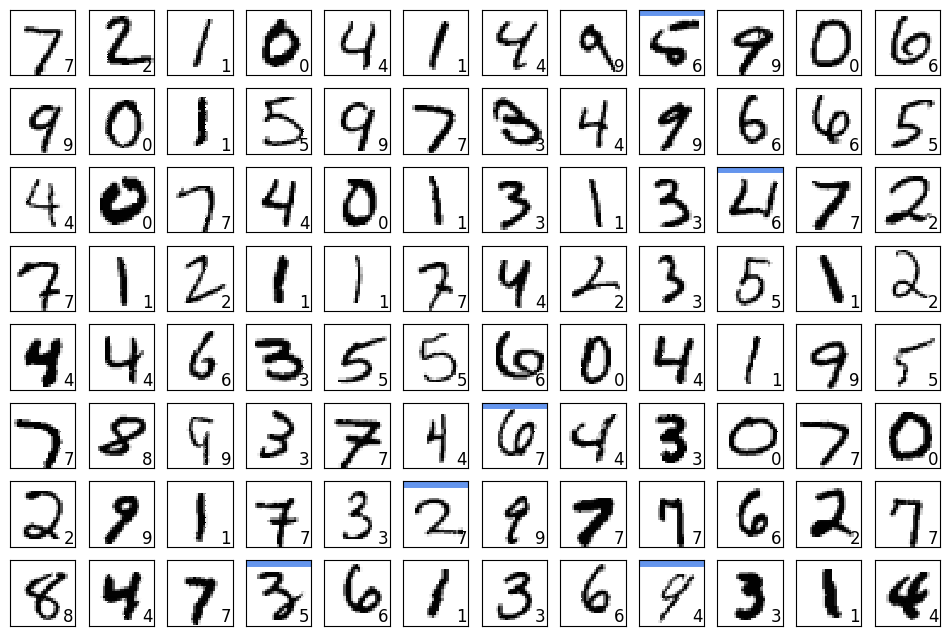

In [10]:
# 리스트 8-1-(9)
show_prediction()
plt.show()


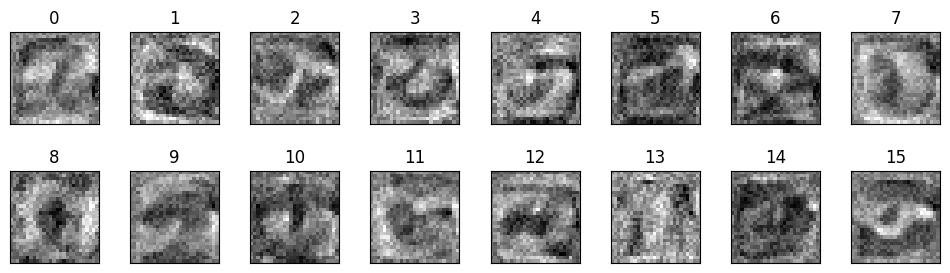

In [11]:
# 리스트 8-1-(10)
# 1층째의 가중치 시각화

w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(16):
  plt.subplot(2, 8, i + 1)
  w1 = w[:, i]
  w1 = w1.reshape(28, 28)
  plt.pcolor(-w1)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
plt.show()

^사진에서 검정부분에 입력이 있으면 활성화 흰부분에 있으면 억제

검정은 양의 값. 흰은 음의 값

In [12]:
# 리스트 8-2-(1)
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

 2차원 이미지라는 공간 정보 spatial(입력의 정렬순서?) ; *CNN*

 중심을 결정할 수 있는 홀수 너비



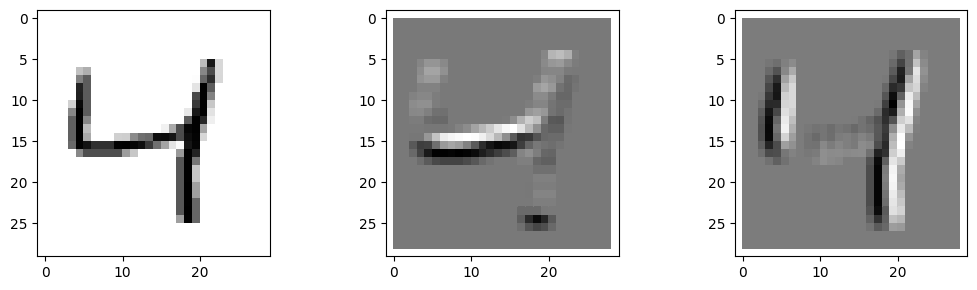

In [13]:
# 리스트 8-2-(2)
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1], [1,1,1], [-2,-2,-2]], dtype=float) #(A) 가로 엣지
myfil2 = np.array([[-2,1,1], [-2,1,1], [-2,1,1]], dtype=float) #(B) 세로 엣지

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

#필터 처리
for ih in range(img_h - 3):
  for iw in range(img_w - 3):
    img_part = x_img[ih:ih + 3, iw:iw + 3]
    out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
    out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

# 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

[ 1, 1, 1]

[ 1, 1, 1]

[-2,-2,-2]

가로 엣지

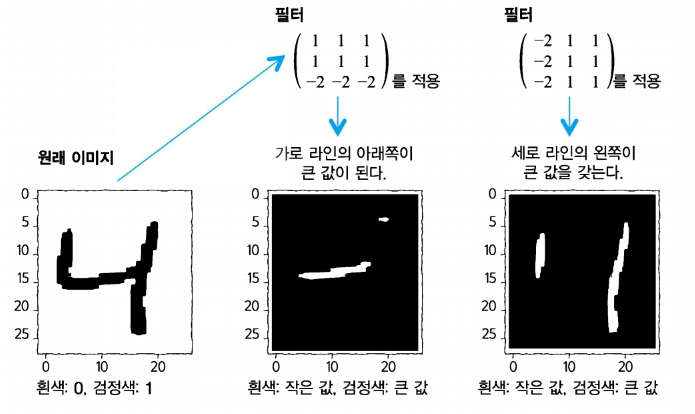

필터의 합이 0이 되게 디자인하면 평탄한 영역은 출력이 0

필터 적용하면 출력이미지가 작아져 "padding"으로 보완

슬라이드slide를 몇간씩 할건가 "Stride"

In [14]:
# 리스트 8-2-(3)

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3,3), padding='same', input_shape=(28,28,1), activation='relu')) #(A)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))


Epoch 1/20
60/60 [==============================] - 3s 10ms/step - loss: 0.8071 - accuracy: 0.8064 - val_loss: 0.3476 - val_accuracy: 0.9036
Epoch 2/20
60/60 [==============================] - 1s 9ms/step - loss: 0.3221 - accuracy: 0.9084 - val_loss: 0.2752 - val_accuracy: 0.9238
Epoch 3/20
60/60 [==============================] - 1s 10ms/step - loss: 0.2699 - accuracy: 0.9229 - val_loss: 0.2404 - val_accuracy: 0.9342
Epoch 4/20
60/60 [==============================] - 1s 9ms/step - loss: 0.2355 - accuracy: 0.9337 - val_loss: 0.2136 - val_accuracy: 0.9400
Epoch 5/20
60/60 [==============================] - 1s 11ms/step - loss: 0.2089 - accuracy: 0.9404 - val_loss: 0.1957 - val_accuracy: 0.9429
Epoch 6/20
60/60 [==============================] - 1s 9ms/step - loss: 0.1889 - accuracy: 0.9463 - val_loss: 0.1761 - val_accuracy: 0.9497
Epoch 7/20
60/60 [==============================] - 0s 7ms/step - loss: 0.1731 - accuracy: 0.9510 - val_loss: 0.1678 - val_accuracy: 0.9541
Epoch 8/20
60/60 

합성곱의 출력은 = 배치 수, 필터 수, 출력이미지의 가로세로 = 4차원

313/313 [==============================] - 1s 2ms/step


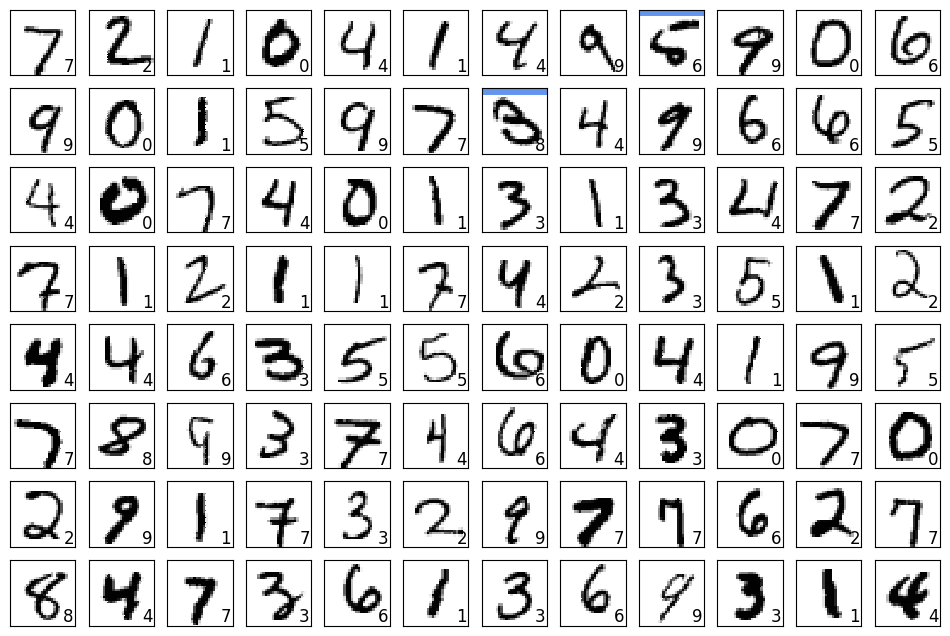

In [15]:
# 리스트 8-2-(4)
show_prediction()
plt.show()


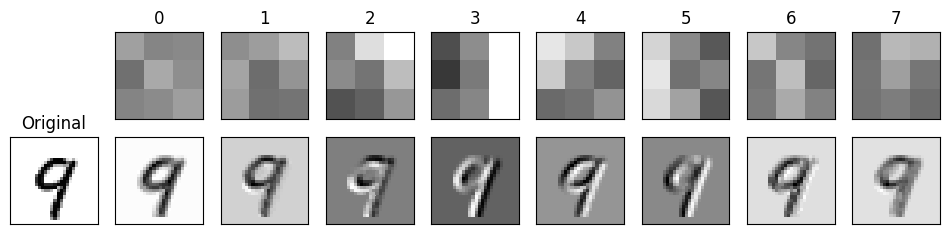

In [16]:
# 리스트 8-2-(5)
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2,9,10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28

x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0] #(A)
max_w = np.max(w)
min_w = np.min(w)

for i in range(8):
  plt.subplot(2, 9, i + 2)
  w1 = w[:, :, 0, i]
  w1 = w1.reshape(3,3)
  plt.pcolor(-w1, vmin=min_w, vmax=max_w)
  plt.xlim(0,3)
  plt.ylim(3,0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
  plt.subplot(2,9,i + 11)
  out_img = np.zeros_like(x_img)

  #필터 처리
  for ih in range(img_h - 3):
    for iw in range(img_w - 3):
      img_part = x_img[ih:ih + 3, iw:iw + 3]
      out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
  plt.pcolor(-out_img)
  plt.xlim(0, img_w)
  plt.ylim(img_h, 0)
  plt.xticks([], "")
  plt.yticks([], "")
plt.show()


Pooling 예를들어 2x2안에서 평균 혹은 가장큰 값으로 대체, 입력 사이즈는 절반으로 됨

드롭아웃 drop out신경망 전체를 다 학습시키지 않고 일부 노드만 무작위로 골라 학습시키는 기법(규제 방)

p라는 비율로 뉴런(node)선택해서 그 뉴런들만 학습시킴, 이후에 추론할 때는 모든 뉴런을 사용하기 때문에 출력을 p를 곱합

예를들어 0.1(10%)만 고르면 추론할때 출력이 10배니까 다시 0.1곱

model.add((Dropout(0.25))0.25가 참여하지 않도록 만든다. 75가지고 학습

In [17]:
# 리스트 8-2-(6)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(A)
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(B)
model.add(Dropout(0.25)) #(C)

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) #(D)
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss:", score[0])
print("test accu:", score[1])
print("computation time:{0:.3f} sec".format(time.time() - startTime))


Epoch 1/20
60/60 [==============================] - 6s 33ms/step - loss: 0.6670 - accuracy: 0.7951 - val_loss: 0.1317 - val_accuracy: 0.9592
Epoch 2/20
60/60 [==============================] - 2s 28ms/step - loss: 0.1393 - accuracy: 0.9574 - val_loss: 0.0648 - val_accuracy: 0.9790
Epoch 3/20
60/60 [==============================] - 2s 28ms/step - loss: 0.0926 - accuracy: 0.9720 - val_loss: 0.0477 - val_accuracy: 0.9849
Epoch 4/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0730 - accuracy: 0.9780 - val_loss: 0.0382 - val_accuracy: 0.9876
Epoch 5/20
60/60 [==============================] - 2s 30ms/step - loss: 0.0605 - accuracy: 0.9817 - val_loss: 0.0310 - val_accuracy: 0.9906
Epoch 6/20
60/60 [==============================] - 2s 28ms/step - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0304 - val_accuracy: 0.9895
Epoch 7/20
60/60 [==============================] - 2s 28ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0266 - val_accuracy: 0.9906
Epoch 8/20
60

313/313 [==============================] - 1s 2ms/step


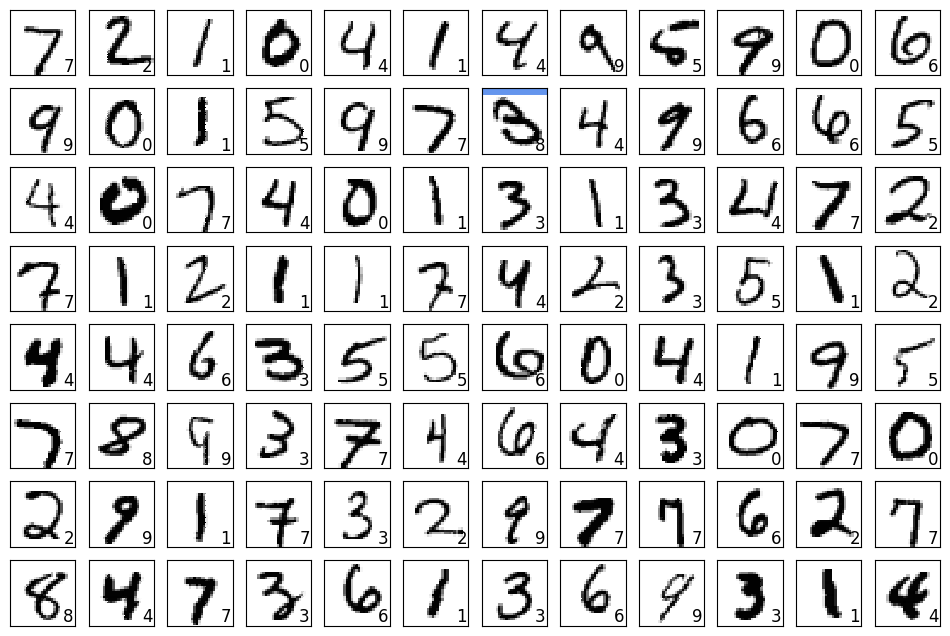

In [18]:
# 리스트 8-2-(7)

show_prediction()
plt.show()